In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [43]:
df = pd.read_csv("/content/laptop_data.csv")
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [45]:
# data di atas memiliki 23 kolom dan 896 baris, dengan tipe data 7 int, 15 object, 1 float.
# mari cek missing value
df.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

sekilas data diatas tidak memiliki missing value, namun jika kita lihat data yang ada, pada kolom display_size memiliki value "Missing" yang berarti missing value pada data

In [46]:
#cek data duplikat
df.duplicated().sum()

20

In [47]:
# hapus duplikat
df = df.drop_duplicates()
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0


Mari kita ubah missing value menjadi NaN terlebih dahulu

In [48]:
df = df.replace("Missing",np.nan)
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,NaN,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,NaN,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,NaN,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,NaN,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,NaN,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,NaN,0,No,No,38990,47990,18,0.0,0,0


cek missing value


In [49]:
df.isna().sum()

brand                0
model               95
processor_brand      0
processor_name       0
processor_gnrtn    238
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
display_size       328
warranty             0
Touchscreen          0
msoffice             0
latest_price         0
old_price            0
discount             0
star_rating          0
ratings              0
reviews              0
dtype: int64

kita memiliki 23 column, sehingga tidak apa jika kita hapus kolom yang memiliki missing value terbanyak. Terlepas dari kolom yang kita punya, dataset kita masih memiliki informasi yang cukup


In [50]:
df = df.drop(columns=["display_size"])
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,ThinNlight,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Casual,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,ThinNlight,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,ThinNlight,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,ThinNlight,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,NaN,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Casual,0,No,No,38990,47990,18,0.0,0,0


# Exploratory Data Analisis

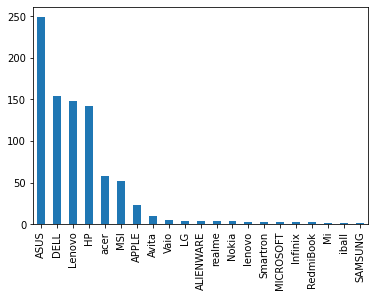

In [51]:
# Univariate analisis
# Brand apa yang paling banyak muncul pada data
counts = df["brand"].value_counts()
counts.plot(kind="bar") # Asus merupakan brand yang paling banyak pada data

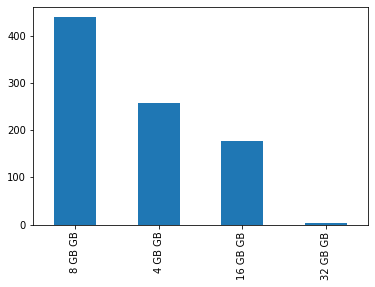

In [52]:
# berapa ukuran ram yang digunakan pada laptop?
counts = df["ram_gb"].value_counts()
counts.plot(kind="bar")

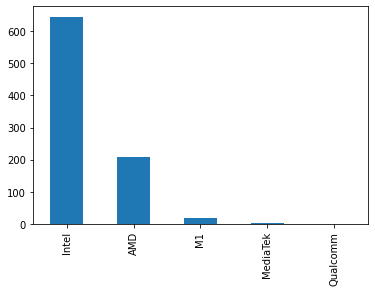

In [53]:
# merk processor apa saja yang digunakan pada laptop
counts = df["processor_brand"].value_counts()
counts.plot(kind="bar")

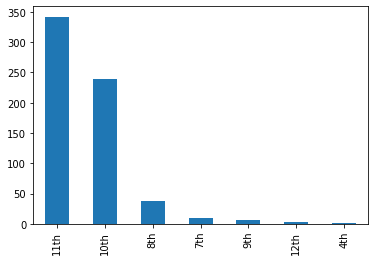

In [54]:
# Generasi processor yang digunakan pada laptop
counts = df["processor_gnrtn"].value_counts()
counts.plot(kind="bar") # kesimpulan yang didapatkan yakni bahwa laptop yanmg digunakan kebanyakan laptop terbaru, dengan chipset processor
                        # generasi 10 dan 11

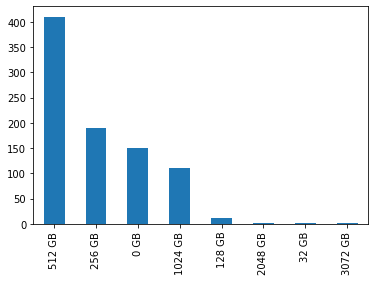

In [55]:
# Jenis-jenis ukuran kapasitas ssd yang digunakan pada laptop
counts = df["ssd"].value_counts()
counts.plot(kind="bar")

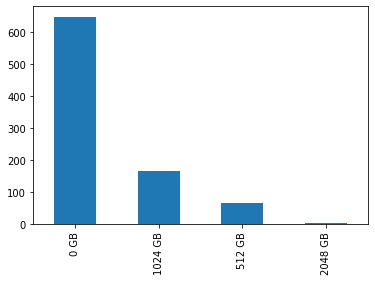

In [56]:
# jenis-jenis ukuran kapasitas hdd yang digunakan pada laptop
counts = df["hdd"].value_counts()
counts.plot(kind="bar")


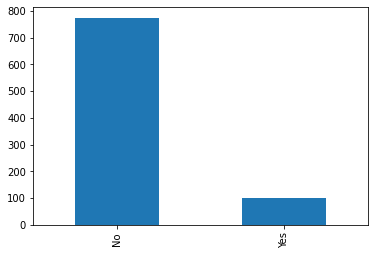

In [57]:
# apakah laptop-laptop yang ada menerapkan fitur Touchscreen?
counts = df["Touchscreen"].value_counts()
counts.plot(kind="bar")

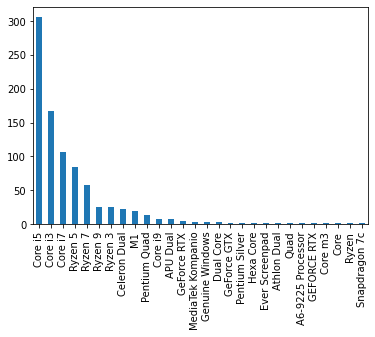

In [58]:
# jenis processor yang digunakan pada laptop
counts = df["processor_name"].value_counts()
counts.plot(kind="bar") # kebanyakan processor pada laptop menggunakan intel core i5

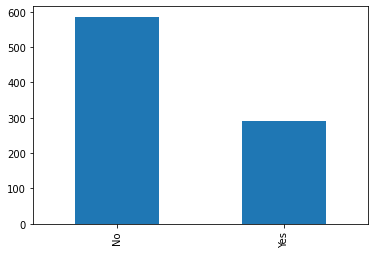

In [59]:
# berapa banyak laptop yang telah terinstall msoffice 
counts = df["msoffice"].value_counts()
counts.plot(kind="bar")

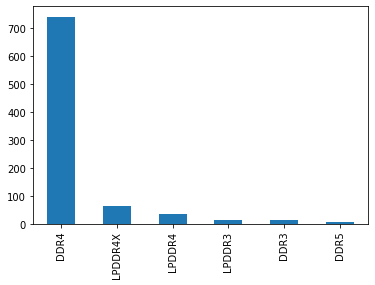

In [60]:
# apa saja type ram yang digunakan pada laptop
counts = df["ram_type"].value_counts()
counts.plot(kind="bar")

In [61]:
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice',
       'latest_price', 'old_price', 'discount', 'star_rating', 'ratings',
       'reviews'],
      dtype='object')

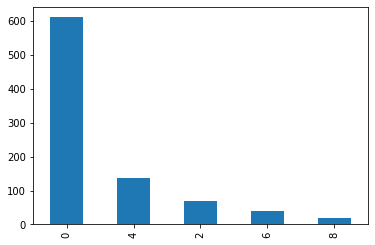

In [62]:
# jenis ukuran graphic_card / VGA dalam satuan GB yang digunakan pada laptop
counts = df["graphic_card_gb"].value_counts()
counts.plot(kind="bar") # kurang dari 30% data yang ada menggunakan vga dengan ukuran 2,4,6,8 GB

## Menangani Missing value dengan teknik arbitrary imputation

In [72]:
# Mengingat dataset yang kita miliki berjumlah sedikit, sehingga saya penerapan teknik imputation yang lain agak dilema..
# seperti imputation mean, median, modus, zero value. Sehingga saya akan menggunakan teknik imputasi arbitrary suka-suka, dengan tujuan menjadikan
# nilai imputasi tersebut menjadi nilai tersendiri

In [73]:
df.isna().sum()

brand                0
model               95
processor_brand      0
processor_name       0
processor_gnrtn    238
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
latest_price         0
old_price            0
discount             0
star_rating          0
ratings              0
reviews              0
dtype: int64

In [74]:
df = df.fillna("x")
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,ThinNlight,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Casual,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,ThinNlight,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,ThinNlight,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,ThinNlight,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,x,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,x,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,x,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,x,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Casual,0,No,No,38990,47990,18,0.0,0,0


In [75]:
df["graphic_card_gb"]

0      0
1      0
2      0
3      0
4      0
      ..
891    0
892    4
893    4
894    0
895    0
Name: graphic_card_gb, Length: 876, dtype: int64

In [76]:
df.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

## Membersihkan data


In [77]:
# menghilangkan karakter string pada data sekaligus mengubahnya menjadi tipe data number
df["ram_gb"] = df["ram_gb"].str.replace("GB GB","")
df["ram_gb"] = pd.to_numeric(df["ram_gb"])

df["ssd"] = df["ssd"].str.replace("GB","")
df["ssd"] = pd.to_numeric(df["ssd"])

df["hdd"] = df["hdd"].str.replace("GB","")
df["hdd"] = pd.to_numeric(df["hdd"])
df



,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4,DDR4,0,1024,Windows,...,ThinNlight,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4,DDR4,0,512,Windows,...,Casual,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,...,ThinNlight,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,...,ThinNlight,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4,DDR4,256,0,Windows,...,ThinNlight,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,x,4,DDR4,1024,0,Windows,...,Casual,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,x,4,DDR4,1024,0,Windows,...,Casual,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,x,4,DDR4,1024,0,Windows,...,Casual,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,x,4,LPDDR4X,0,512,Windows,...,Casual,0,No,No,38990,47990,18,0.0,0,0


In [83]:
df["os_bit"] = df["os_bit"].str.replace("-bit","")
df["os_bit"] = pd.to_numeric(df["os_bit"])

## Melihat korelasi label latest_price terhadap fitur kategorical

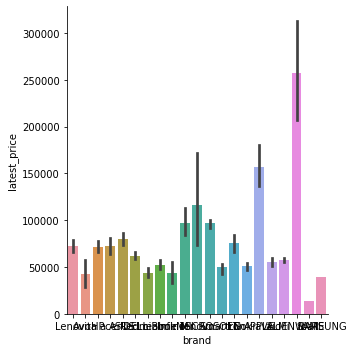

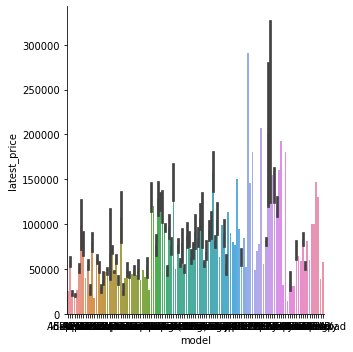

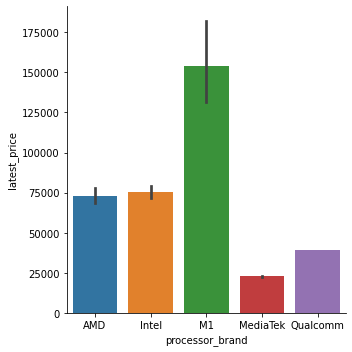

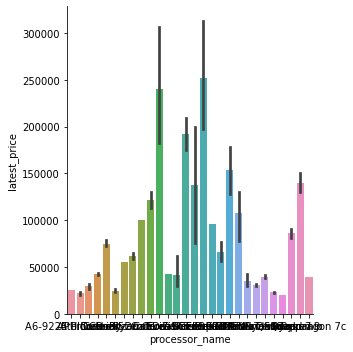

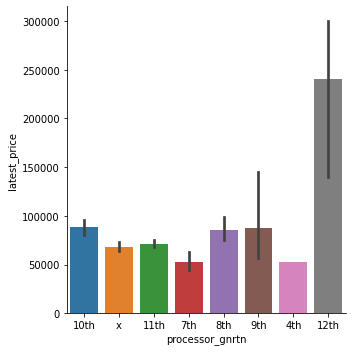

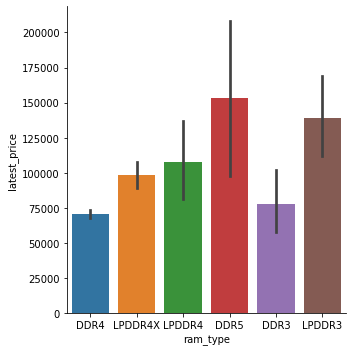

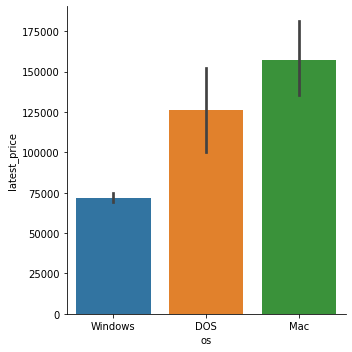

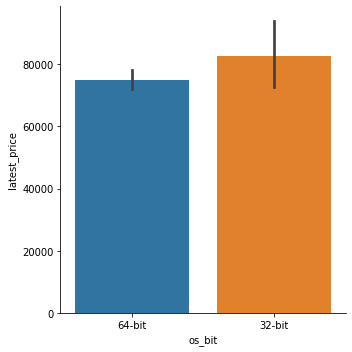

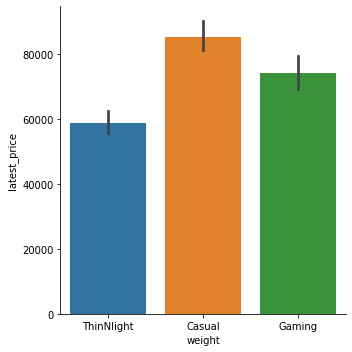

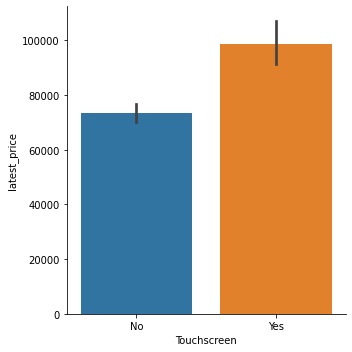

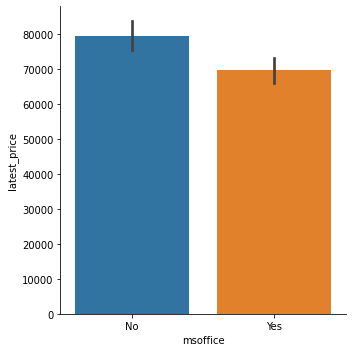

In [80]:
# Melihat korelasi fitur latestprice terhadap fitur kategorical
cat_feature = df.select_dtypes(include="object")
cat_feature = cat_feature.columns

for column in cat_feature:
  sns.catplot(x=column, y="latest_price", data=df, kind="bar")

## Menangani data ordinal atau data yang berurutan dengan label encoder


In [81]:
# data ordinal atau data yang berurutan mencakup kolom processor_gnrtn, dan ram_type
le = LabelEncoder()
df["processor_gnrtn"] = le.fit_transform(df["processor_gnrtn"])
df["ram_type"] = le.fit_transform(df["ram_type"])
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,0,4,1,0,1024,Windows,...,ThinNlight,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,0,4,1,0,512,Windows,...,Casual,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,0,4,1,256,0,Windows,...,ThinNlight,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,7,4,5,0,512,Windows,...,Casual,0,No,No,38990,47990,18,0.0,0,0


## Menangani binary data dengan mengubah "yes" menjadi 1, dan "no" jadi 0

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 895
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            876 non-null    object 
 1   model            876 non-null    object 
 2   processor_brand  876 non-null    object 
 3   processor_name   876 non-null    object 
 4   processor_gnrtn  876 non-null    int64  
 5   ram_gb           876 non-null    int64  
 6   ram_type         876 non-null    int64  
 7   ssd              876 non-null    int64  
 8   hdd              876 non-null    int64  
 9   os               876 non-null    object 
 10  os_bit           876 non-null    int64  
 11  graphic_card_gb  876 non-null    int64  
 12  weight           876 non-null    object 
 13  warranty         876 non-null    int64  
 14  Touchscreen      876 non-null    int64  
 15  msoffice         876 non-null    int64  
 16  latest_price     876 non-null    int64  
 17  old_price       

In [85]:
df["Touchscreen"] = df["Touchscreen"].apply(lambda x: 1 if x == "Yes" else(0 if x == "No" else None))
df["msoffice"] = df["msoffice"].apply(lambda x: 1 if x == "Yes" else(0 if x == "No" else None))
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,0,4,1,0,1024,Windows,...,ThinNlight,0,0,0,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,0,4,1,0,512,Windows,...,Casual,0,0,0,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,0,0,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,0,0,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,0,4,1,256,0,Windows,...,ThinNlight,0,0,0,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,7,4,5,0,512,Windows,...,Casual,0,0,0,38990,47990,18,0.0,0,0


In [123]:
df["os_bit"] = df["os_bit"].apply(lambda x: 1 if x == 64 else (0 if x == 32 else None))
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,0,4,1,0,1024,Windows,...,ThinNlight,0,0,0,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,0,4,1,0,512,Windows,...,Casual,0,0,0,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,0,0,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,0,0,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,0,4,1,256,0,Windows,...,ThinNlight,0,0,0,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,7,4,5,0,512,Windows,...,Casual,0,0,0,38990,47990,18,0.0,0,0


## Menangani data nominal atau data yang tidak berurutan dengan one hot encoding


In [124]:
# nominal data terletak pada kolom, brand, model, processor_brand, processor_name, os, weight, 
category = pd.get_dummies(df[["brand","model","processor_brand","processor_name","os","weight"]])
category

,brand_ALIENWARE,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Infinix,brand_LG,brand_Lenovo,brand_MICROSOFT,...,processor_name_Ryzen 5,processor_name_Ryzen 7,processor_name_Ryzen 9,processor_name_Snapdragon 7c,os_DOS,os_Mac,os_Windows,weight_Casual,weight_Gaming,weight_ThinNlight
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
892,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
893,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [125]:
saved_df = df.copy()

In [126]:
new_df = pd.concat([df, category],axis=1)
new_df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,processor_name_Ryzen 5,processor_name_Ryzen 7,processor_name_Ryzen 9,processor_name_Snapdragon 7c,os_DOS,os_Mac,os_Windows,weight_Casual,weight_Gaming,weight_ThinNlight
0,Lenovo,A6-9225,AMD,A6-9225 Processor,0,4,1,0,1024,Windows,...,0,0,0,0,0,0,1,0,0,1
1,Lenovo,Ideapad,AMD,APU Dual,0,4,1,0,512,Windows,...,0,0,0,0,0,0,1,1,0,0
2,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,0,0,0,0,0,0,1,0,0,1
3,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,0,0,0,0,0,0,1,0,0,1
4,Avita,PURA,AMD,APU Dual,0,4,1,256,0,Windows,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,0,0,1,0,0,0,1,1,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,0,0,1,0,0,0,1,1,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,0,0,1,0,0,0,1,1,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,7,4,5,0,512,Windows,...,0,0,0,1,0,0,1,1,0,0


In [127]:
# drop kolom original
new_df = new_df.drop(columns=["brand","model","processor_brand","processor_name","os","weight"])
new_df

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os_bit,graphic_card_gb,warranty,Touchscreen,msoffice,...,processor_name_Ryzen 5,processor_name_Ryzen 7,processor_name_Ryzen 9,processor_name_Snapdragon 7c,os_DOS,os_Mac,os_Windows,weight_Casual,weight_Gaming,weight_ThinNlight
0,0,4,1,0,1024,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,4,1,0,512,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,4,1,128,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,4,1,128,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,4,1,256,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,7,4,1,1024,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
892,7,4,1,1024,0,1,4,1,0,0,...,0,0,1,0,0,0,1,1,0,0
893,7,4,1,1024,0,1,4,1,0,0,...,0,0,1,0,0,0,1,1,0,0
894,7,4,5,0,512,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


## Membagi data latih dan data uji


In [138]:
fitur = new_df.drop(columns=["latest_price"])
label = new_df["latest_price"]

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(fitur, label, test_size=.2, random_state=42)


## Modeling menggunakan beberapa algoritma

In [140]:
rf = RandomForestRegressor(n_estimators=80, max_depth=16)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=16, n_estimators=80)

In [141]:
mae = mean_absolute_error(Y_train, rf.predict(X_train))
mae

1527.4428245349886

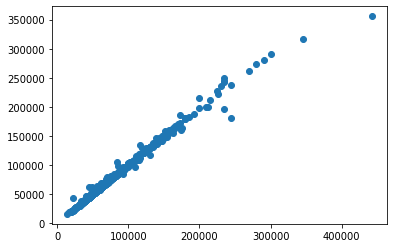

In [142]:
plt.scatter(Y_train, rf.predict(X_train))

In [143]:
prediksi = rf.predict(X_test)
hasil = {"Label" : Y_test, "hasil_prediksi" : prediksi}
pd.DataFrame(hasil)

,Label,hasil_prediksi
371,113590,108174.212500
674,169990,158507.262500
848,92990,92481.825000
712,44490,43774.234127
217,106167,103666.987500
...,...,...
415,82990,83673.500000
295,63990,64678.713462
477,46790,48568.275000
84,41990,40963.665950


In [144]:
rf.score(X_test,Y_test)

0.9294058643600216

In [148]:
boosting = AdaBoostRegressor(n_estimators = 50, learning_rate= 0.005)
boosting.fit(X_train, Y_train)

AdaBoostRegressor(learning_rate=0.005)

In [150]:
boosting_mae = mean_absolute_error(Y_test, boosting.predict(X_test))
boosting_mae

13396.961729130147

In [151]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [152]:
linreg_mae = mean_absolute_error(Y_train, linreg.predict(X_train))
linreg_mae

8870.703284187468

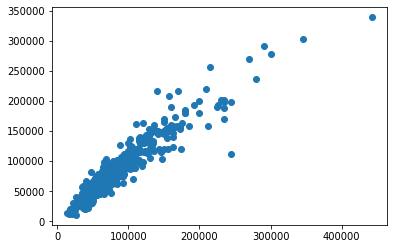

In [154]:
plt.scatter(Y_train, linreg.predict(X_train))

In [158]:
model_dict = {"rf" : rf, "boosting" : boosting, "lr" : linreg}
model_mae = pd.DataFrame(index=["rf","boosting","lr"], columns=["train_mae","test_mae"])
for x,y in model_dict.items():
  model_mae.loc[x,"train_mae"] = mean_absolute_error(Y_train, y.predict(X_train))
  model_mae.loc[x,"test_mae"] = mean_absolute_error(Y_test, y.predict(X_test))

model_mae

,train_mae,test_mae
rf,1527.442825,3579.07083
boosting,13116.365134,13396.961729
lr,8870.703284,12176.54745


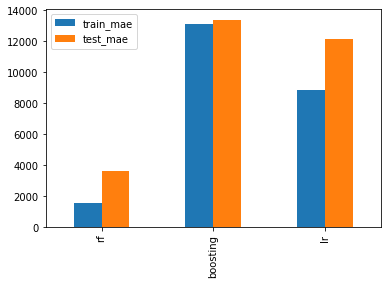

In [159]:
model_mae.plot(kind="bar")

### Terlihat bahwa algoritma random forest memiliki mae yang paling kecil, sehingga model inilah yang optimal untuk dataset prediksi harga laptop


#Improve model dengan hyperparameter tuning menggunakan GridSearchCV

In [161]:
grid_params = {"n_estimators" : [50,60,70,80,90,100], "max_depth" : [4,8,16,32,64]}
grid = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, verbose=2, scoring="neg_mean_absolute_error")
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......................max_depth=4, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=4, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=4, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=4, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=60; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=60; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=60; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=60; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=60; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=70; total time=   0.2s
[CV] END .......................max_depth=4, n_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8, 16, 32, 64],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='neg_mean_absolute_error', verbose=2)

In [162]:
print(grid.best_params_)

{'max_depth': 32, 'n_estimators': 100}


## Melatih ulang model menggunakan parameter terbaik

In [163]:
model = RandomForestRegressor(n_estimators=100, max_depth=32)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=32)

In [167]:
model_mae.loc["rf","train_mae"] = mean_absolute_error(Y_train, model.predict(X_train))
model_mae.loc["rf","test_mae"] = mean_absolute_error(Y_test, model.predict(X_test))
model_mae

,train_mae,test_mae
rf,1542.666733,3429.016023
boosting,13116.365134,13396.961729
lr,8870.703284,12176.54745


In [177]:
prediksi = {"Y_true" : Y_test[:2]}
coba = X_test.iloc[:2].copy()

prediksi["random_forest"] = model.predict(coba).round(1)
pd.DataFrame(prediksi)

,Y_true,random_forest
371,113590,108245.3
674,169990,157384.3
